In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('file.csv')

In [3]:
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-05-23 23:59:09+00:00,1528888293852872704,#TikTok #russia #refugeecrisis #ukraine #famin...,Danaya_Pashneya
1,1,2022-05-23 23:58:52+00:00,1528888224713777154,Russian diplomat to U.N. Boris Bondarev resign...,MJoyce2625
2,2,2022-05-23 23:58:52+00:00,1528888224197660672,Ukrainian Presidential Office discloses how ma...,knittingknots
3,3,2022-05-23 23:58:52+00:00,1528888221907636224,Ukraine War: The battle for Severodonetsk http...,will385
4,4,2022-05-23 23:58:47+00:00,1528888200696975360,Alexander Lukashenko reminds me of an abused s...,i__heart__this


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10001 non-null  int64 
 1   Datetime    10001 non-null  object
 2   Tweet Id    10001 non-null  int64 
 3   Text        10001 non-null  object
 4   Username    10001 non-null  object
dtypes: int64(2), object(3)
memory usage: 390.8+ KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
Datetime      0
Tweet Id      0
Text          0
Username      0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username'], dtype='object')

In [7]:
text_df = df.drop(['Unnamed: 0', 'Datetime', 'Tweet Id','Username'],axis=1)
text_df.head()

,Text
0,#TikTok #russia #refugeecrisis #ukraine #famin...
1,Russian diplomat to U.N. Boris Bondarev resign...
2,Ukrainian Presidential Office discloses how ma...
3,Ukraine War: The battle for Severodonetsk http...
4,Alexander Lukashenko reminds me of an abused s...


In [8]:
print(text_df['Text'].iloc[0],"\n")
print(text_df['Text'].iloc[1],"\n")
print(text_df['Text'].iloc[2],"\n")
print(text_df['Text'].iloc[3],"\n")
print(text_df['Text'].iloc[4],"\n")

#TikTok #russia #refugeecrisis #ukraine #famine #europe #UkraineRussiaWar #ukrainewar https://t.co/fdR9qROZgR 

Russian diplomat to U.N. Boris Bondarev resigns over Putin's Ukraine war - The Washington Post https://t.co/PlcBZPFzXo 

Ukrainian Presidential Office discloses how many Ukrainian children have been forcibly deported by the aggressors since the start of the war  | Ukrayinska Pravda https://t.co/EDmen4LqX4 #Ukraine #UkraineRussiaWar #UkraineUnderAttaсk #UkraineWar 

Ukraine War: The battle for Severodonetsk https://t.co/l0UlsO65S1 via @YouTube 

Alexander Lukashenko reminds me of an abused spouse who is telling the kids it was their fault that the abuser got mad.  #UkraineWar 



In [9]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    10001 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [10]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
text_df.text = text_df['Text'].apply(data_processing)

In [13]:
text_df.drop_duplicates('Text')

,Text
0,#TikTok #russia #refugeecrisis #ukraine #famin...
1,Russian diplomat to U.N. Boris Bondarev resign...
2,Ukrainian Presidential Office discloses how ma...
3,Ukraine War: The battle for Severodonetsk http...
4,Alexander Lukashenko reminds me of an abused s...
...,...
9996,@akshayalladi China doesn't want to treat anyo...
9997,@karstenk713 @CikaCrni21 @welt ja klar sorgt d...
9998,"""Unprecedented"": Azov reveals how helicopters ..."
9999,A lesson from the Ukraine war: Secure our semi...


In [14]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [15]:
text_df['Text'] = text_df['Text'].apply(lambda x: stemming(x))

In [16]:
text_df.head()

,Text
0,#TikTok #russia #refugeecrisis #ukraine #famin...
1,Russian diplomat to U.N. Boris Bondarev resign...
2,Ukrainian Presidential Office discloses how ma...
3,Ukraine War: The battle for Severodonetsk http...
4,Alexander Lukashenko reminds me of an abused s...


In [17]:
print(text_df['Text'].iloc[0],"\n")
print(text_df['Text'].iloc[1],"\n")
print(text_df['Text'].iloc[2],"\n")
print(text_df['Text'].iloc[3],"\n")
print(text_df['Text'].iloc[4],"\n")

#TikTok #russia #refugeecrisis #ukraine #famine #europe #UkraineRussiaWar #ukrainewar https://t.co/fdR9qROZgR 

Russian diplomat to U.N. Boris Bondarev resigns over Putin's Ukraine war - The Washington Post https://t.co/PlcBZPFzXo 

Ukrainian Presidential Office discloses how many Ukrainian children have been forcibly deported by the aggressors since the start of the war  | Ukrayinska Pravda https://t.co/EDmen4LqX4 #Ukraine #UkraineRussiaWar #UkraineUnderAttaсk #UkraineWar 

Ukraine War: The battle for Severodonetsk https://t.co/l0UlsO65S1 via @YouTube 

Alexander Lukashenko reminds me of an abused spouse who is telling the kids it was their fault that the abuser got mad.  #UkraineWar 



In [18]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    10001 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [19]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [20]:
text_df['polarity'] = text_df['Text'].apply(polarity)

In [21]:
text_df.head(10)

,Text,polarity
0,#TikTok #russia #refugeecrisis #ukraine #famin...,0.000
1,Russian diplomat to U.N. Boris Bondarev resign...,0.000
2,Ukrainian Presidential Office discloses how ma...,0.500
3,Ukraine War: The battle for Severodonetsk http...,0.000
4,Alexander Lukashenko reminds me of an abused s...,-0.625
5,Ukraine war: Russian soldier Vadim Shishimarin...,0.000
6,I was still celebrating the Ukraine war with a...,0.000
7,Russian diplomat quits over Ukraine war and sa...,0.000
8,"Russia-Ukraine War: America, trapped in its wo...",0.000
9,Top Russian diplomat to UN resigns over Ukrain...,0.250


In [22]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [23]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [24]:
text_df.head()

,Text,polarity,sentiment
0,#TikTok #russia #refugeecrisis #ukraine #famin...,0.000,Neutral
1,Russian diplomat to U.N. Boris Bondarev resign...,0.000,Neutral
2,Ukrainian Presidential Office discloses how ma...,0.500,Positive
3,Ukraine War: The battle for Severodonetsk http...,0.000,Neutral
4,Alexander Lukashenko reminds me of an abused s...,-0.625,Negative


<Axes: xlabel='sentiment', ylabel='count'>

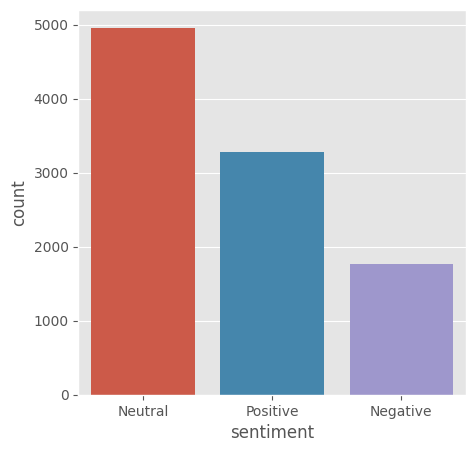

In [25]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

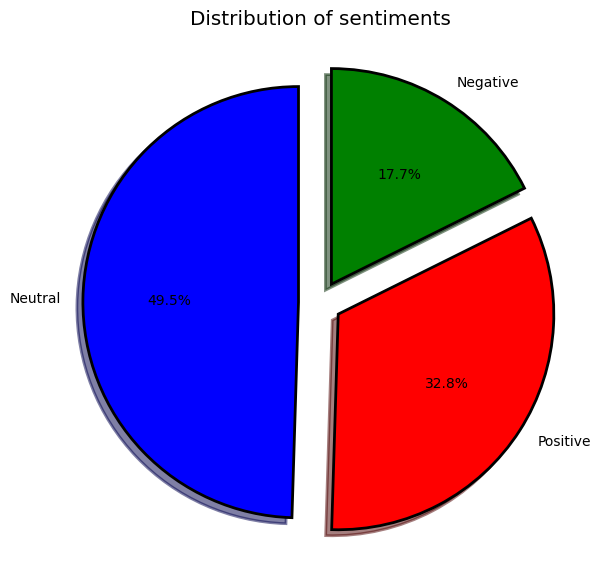

In [26]:
fig = plt.figure(figsize=(7,7))
colors = ("blue", "red", "green")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
          startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [27]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Text,polarity,sentiment
9641,"Great job, Patrick! #UkraineWar #animal #Rescu...",1.0,Positive
6703,"🇷🇺The motorized riflemen of the ""O"" group have...",1.0,Positive
1520,The Greatest Casualty of the Ukraine War Could...,1.0,Positive
7780,@andy_murray @Wimbledon is taking a stand agai...,1.0,Positive
1159,"Read this, look at the pictures &amp; remind y...",1.0,Positive


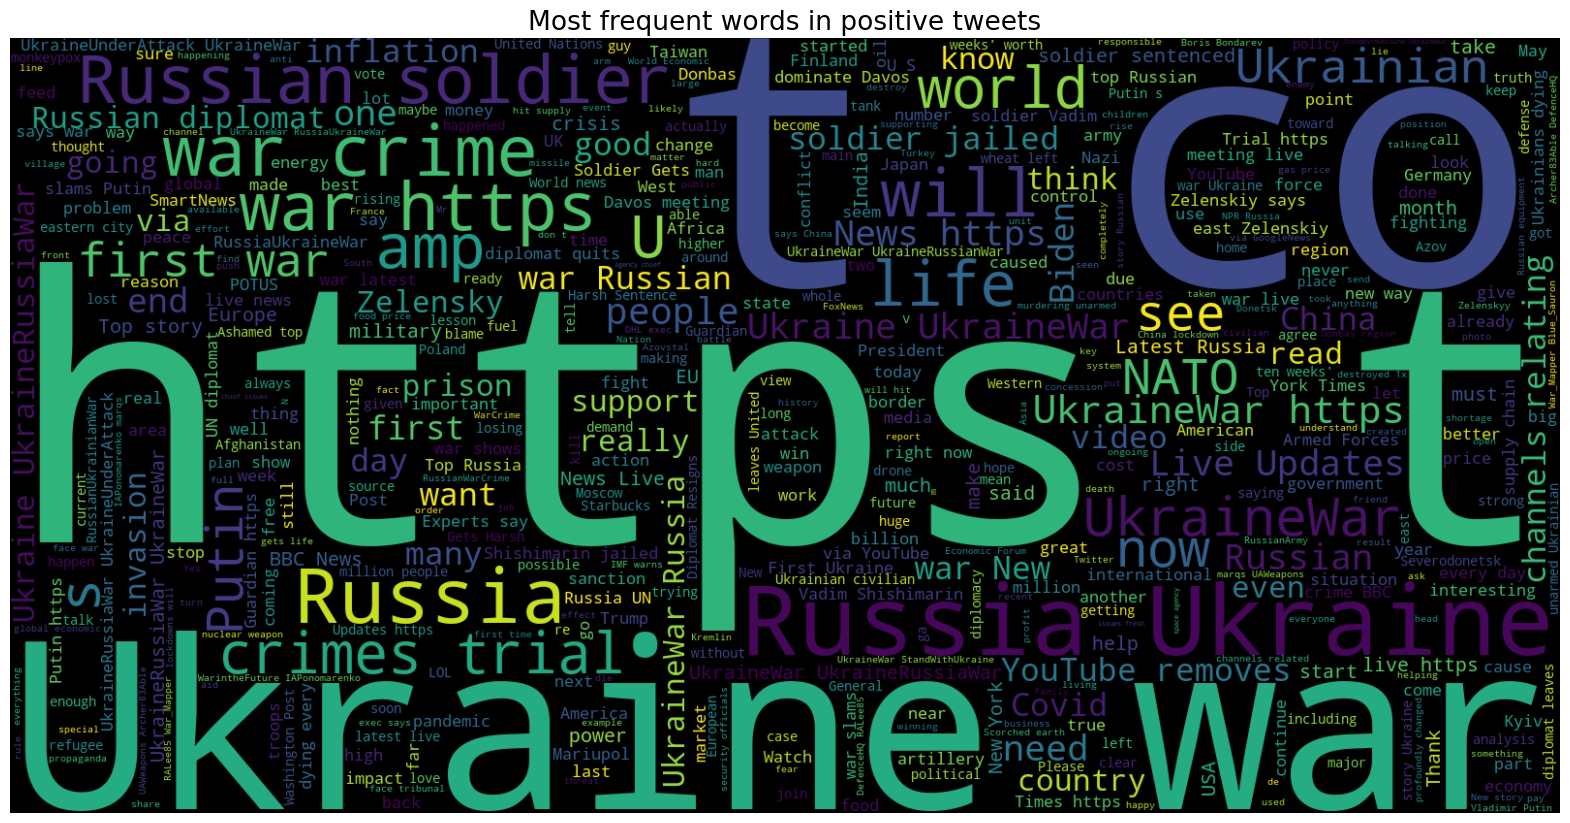

In [28]:
text = ' '.join([word for word in pos_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [29]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Text,polarity,sentiment
8073,"In #Kherson(South of Ukraine), #Russian occupi...",-0.001389,Negative
9546,@Rch_or_die_rekt @Arnoldsdesign @CryptoDonAlt ...,-0.004167,Negative
7464,Do you know that all #Russian liberals are ene...,-0.005556,Negative
2161,Russian diplomat resigns over Ukraine war: ‘En...,-0.007143,Negative
7184,"@0xCyan @0xCyan, China's trading way will care...",-0.007292,Negative


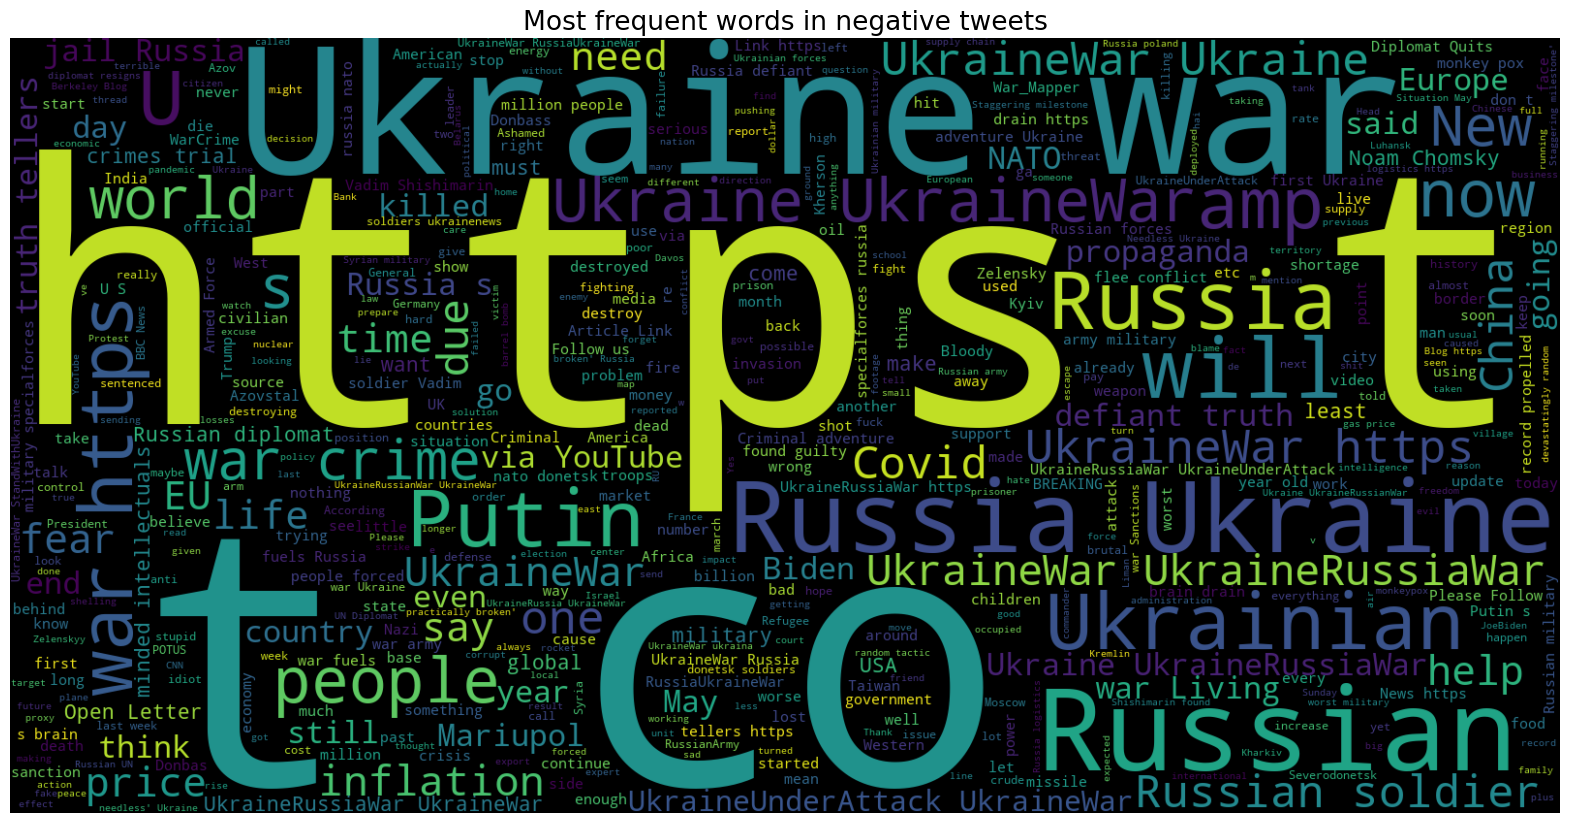

In [30]:
text = ' '.join([word for word in neg_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [31]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Text,polarity,sentiment
0,#TikTok #russia #refugeecrisis #ukraine #famin...,0.0,Neutral
6738,OPINION: Ukraine war has taught us that we are...,0.0,Neutral
6756,Zelensky: Only diplomacy can end Ukraine war -...,0.0,Neutral
6755,BULLETIN: POLISH TROOPS HAVE ENTERED UKRAINE W...,0.0,Neutral
6754,"So now after he gets billions and support ,,,,...",0.0,Neutral


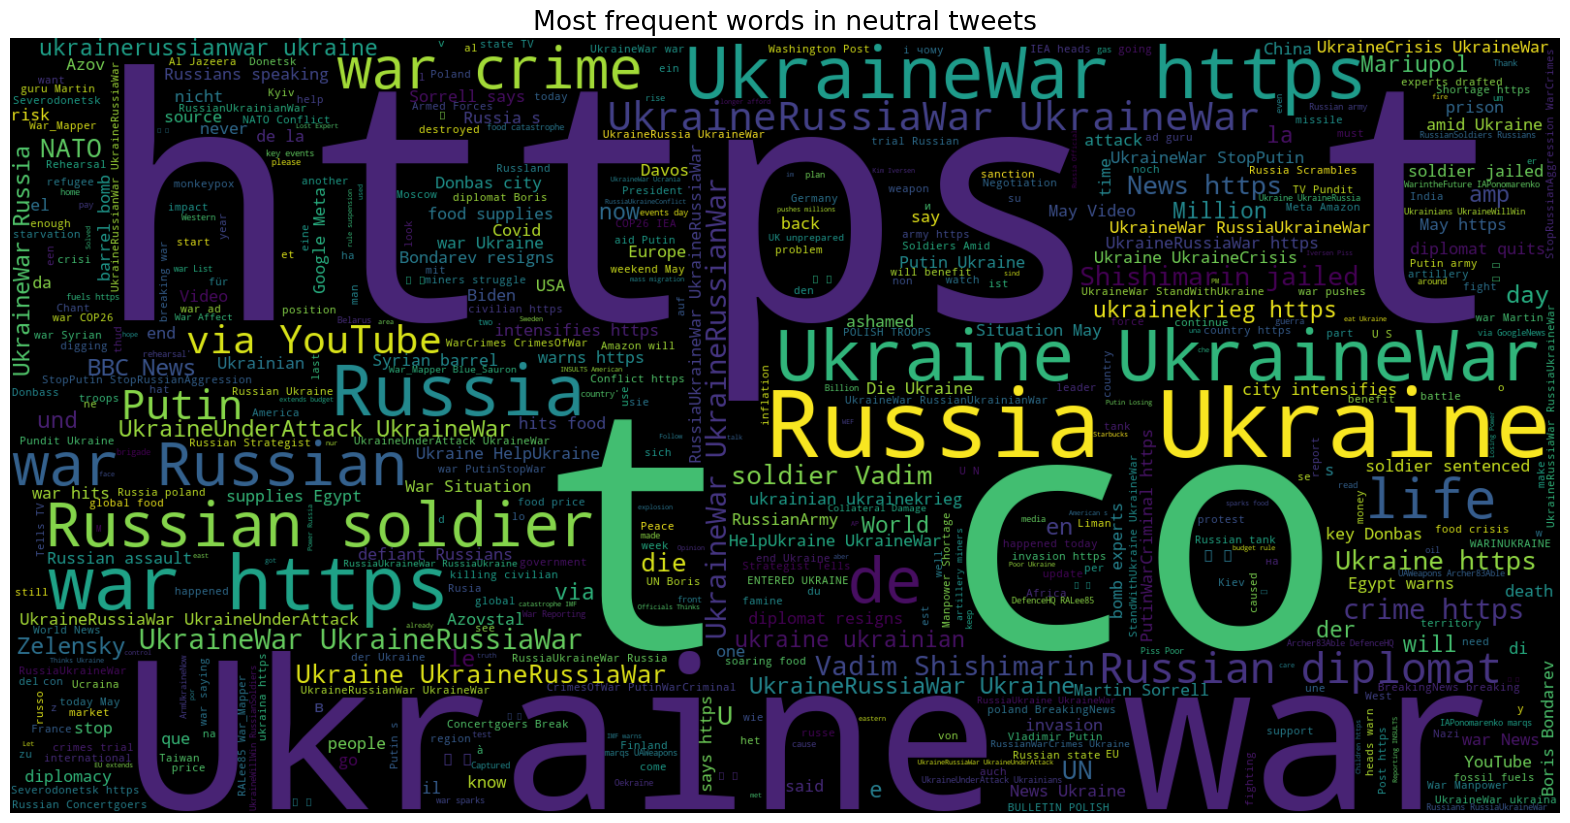

In [32]:
text = ' '.join([word for word in neutral_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [33]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Text'])

In [34]:
# Get the feature names
feature_names = vect.get_feature_names_out()

print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))


Number of features: 144920

First 20 features:
 ['00' '00 00' '00 15pm' '00 am' '00 bbc' '00 cest' '00 gmt' '00 on'
 '00 pm' '00 utc' '000' '000 000' '000 22' '000 according' '000 alleged'
 '000 americans' '000 are' '000 armored' '000 busd' '000 cases']


In [35]:
X = text_df['Text']
Y = text_df['sentiment']
X = vect.transform(X)

In [36]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now you can print their shapes
print("Size of x_train:", x_train.shape)
print("Size of y_train:", y_train.shape)
print("Size of x_test:", x_test.shape)
print("Size of y_test:", y_test.shape)


Size of x_train: (8000, 144920)
Size of y_train: (8000,)
Size of x_test: (2001, 144920)
Size of y_test: (2001,)


In [37]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 83.01%


In [38]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[218  73  64]
 [ 19 934  37]
 [ 47 100 509]]


              precision    recall  f1-score   support

    Negative       0.77      0.61      0.68       355
     Neutral       0.84      0.94      0.89       990
    Positive       0.83      0.78      0.80       656

    accuracy                           0.83      2001
   macro avg       0.82      0.78      0.79      2001
weighted avg       0.83      0.83      0.83      2001



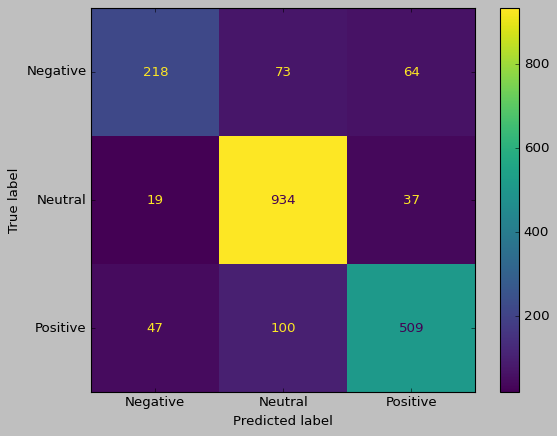

In [39]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [42]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [43]:
y_pred = grid.predict(x_test)

In [45]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 83.26%


In [46]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[222  72  61]
 [ 20 930  40]
 [ 49  93 514]]


              precision    recall  f1-score   support

    Negative       0.76      0.63      0.69       355
     Neutral       0.85      0.94      0.89       990
    Positive       0.84      0.78      0.81       656

    accuracy                           0.83      2001
   macro avg       0.82      0.78      0.80      2001
weighted avg       0.83      0.83      0.83      2001



In [47]:
from sklearn.svm import LinearSVC

In [48]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)


LinearSVC()

In [49]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 83.71%


In [50]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[221  79  55]
 [ 23 931  36]
 [ 46  87 523]]


              precision    recall  f1-score   support

    Negative       0.76      0.62      0.69       355
     Neutral       0.85      0.94      0.89       990
    Positive       0.85      0.80      0.82       656

    accuracy                           0.84      2001
   macro avg       0.82      0.79      0.80      2001
weighted avg       0.83      0.84      0.83      2001



In [51]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [52]:
print("Best Parameter:", grid.best_params_)

Best Parameter: {'C': 10}


In [53]:
y_pred = grid.predict(x_test)

In [54]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.01%


In [55]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[222  78  55]
 [ 23 932  35]
 [ 45  84 527]]


              precision    recall  f1-score   support

    Negative       0.77      0.63      0.69       355
     Neutral       0.85      0.94      0.89       990
    Positive       0.85      0.80      0.83       656

    accuracy                           0.84      2001
   macro avg       0.82      0.79      0.80      2001
weighted avg       0.84      0.84      0.84      2001



In [2]:
!pip install streamlit


In [3]:
%%writefile sentiment_analysis_app.py

import streamlit as st
from textblob import TextBlob

st.title("Sentiment Analysis")

message = st.text_area("Please Enter Your Text")

if st.button("Analyze Sentiment"):
    blob = TextBlob(message)
    result = blob.sentiment
    polarity = result.polarity
    subjectivity = result.subjectivity

    st.markdown("### Sentiment Analysis Result:")
    st.write(f"Polarity: {polarity}, Subjectivity: {subjectivity}")

    if polarity < 0:
        st.warning("The entered text has negative sentiments associated with it. Polarity: {:.2f}".format(polarity))
    elif polarity >= 0:
        st.success("The entered text has positive sentiments associated with it. Polarity: {:.2f}".format(polarity))

    st.bar_chart({"Polarity": polarity, "Subjectivity": subjectivity})


Writing sentiment_analysis_app.py
